<a href="https://colab.research.google.com/github/LxMera/Deep-Learning---denoising-rs-fMRI/blob/master/Validation_with_other_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
if os.path.exists('Data'):   
    print ('The folder already exists')
else:
    print ('Downloading data... ')
    os.system('wget -nc https://www.dropbox.com/s/guxvqiq824hhc60/Data.zip?dl=1')
    os.system('unzip Data.zip?dl=1 -d Data')
    os.system('rm -r Data.zip?dl=1')
    os.system('wget -nc https://www.dropbox.com/s/n9zq7srft09ef76/main_features.py?dl=1')   
    os.system('wget -nc https://www.dropbox.com/s/5668qyb69793m8p/Hand.zip?dl=1')
    os.system('unzip Hand.zip?dl=1 -d Data/')
    os.system('rm -r Hand.zip?dl=1')
    os.system('mv main_features.py?dl=1 main_features.py')
    os.system('wget -nc https://www.dropbox.com/s/tc9y40d8c8kskuv/Standard.zip?dl=1')
    os.system('unzip Standard.zip?dl=1 -d Data/')
    os.system('rm -r Standard.zip?dl=1')
    os.system('wget -nc https://www.dropbox.com/s/u27lvmaw5cakpr8/WhII.zip?dl=1')
    os.system('unzip WhII.zip?dl=1 -d Data/')
    os.system('rm -r WhII.zip?dl=1')
    os.system('wget -nc https://www.dropbox.com/s/m432eescwggki6t/model1.py?dl=1')
    os.system('mv model1.py?dl=1 model1.py')

The folder already exists


HCP_hp2000 &emsp;&emsp;&emsp;&emsp;&emsp; TR=0.7

Hand_clasifi &emsp;&emsp;&emsp;&emsp;&emsp; TR=2.0

Standard &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; TR=3.0

WhII_MB6 &emsp;&emsp;&emsp;&emsp;&emsp; TR=1.3

WhII Standard &emsp;&emsp;&emsp; TR=3.0

In [0]:
import scipy.io
import numpy as np
import main_features as mf
import model1 as mod
from sklearn.preprocessing import StandardScaler
import glob
import matplotlib.pyplot as plt

In [17]:
Dat=np.sort(glob.glob('Data/*Data*.mat'))
Lab=np.sort(glob.glob('Data/*Label*.mat'))
TimeR=[0.7, 2.0, 3.0, 3.0, 3.0, 1.3, 1.3, 3.0]
TimeR=[1.3, 3.0, 3.0, 3.0, 1.3, 2.0, 0.7, 3.0]

for i in range(8):
  print(Dat[i], '\t\t', Lab[i])

Data/1000WhII_MB6Data.mat 		 Data/1000WhII_MB6Labels.mat
Data/145StandData.mat 		 Data/145StandLabels.mat
Data/180StandData.mat 		 Data/180StandLabels.mat
Data/200StandData.mat 		 Data/200StandLabels.mat
Data/460WhII_MB6Data.mat 		 Data/460WhII_MB6Labels.mat
Data/HandData.mat 		 Data/HandLabel.mat
Data/Hp2000Data.mat 		 Data/Hp2000Labels.mat
Data/WhII_StaData.mat 		 Data/WhII_StaLabels.mat


In [18]:
mod.downloadH5()
network=mod.get_model()
scaler = StandardScaler()

#points, TR, timeTotal, components, accuracy
summary=np.zeros((8,5), np.dtype('float32'))

for i in range(8):
  series = scipy.io.loadmat(Dat[i])
  labels = scipy.io.loadmat(Lab[i])

  Data=series[list(series.keys())[-1]]
  Labe=np.transpose(labels[list(labels.keys())[-1]])[:,0]

  points=np.shape(Data)[0]
  TR=TimeR[i]

  if i%2==0:
    print('\033[95m\n')
  else:
    print('\033[92m\n')
  print (Dat[i][5:])
  print ('Time points and components ', np.shape(Data))
  print ('Labels per component', np.shape(Labe),'\n')

  metrics=mf.Metrics6(Data, TR, points)
  X_testN = scaler.fit_transform(np.transpose(metrics))
  preds = network.predict_classes(X_testN, verbose=0)
  AccuracyR = np.mean(preds == (Labe))
  print('\033[94mPrecision = ', AccuracyR*100, '%')

  summary[i,0]=points
  summary[i,1]=TR
  summary[i,2]=points*TR
  summary[i,3]=np.shape(Data)[1]
  summary[i,4]=AccuracyR

The file already exists
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 13)                91        
_________________________________________________________________
activation_3 (Activation)    (None, 13)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 84        
_________________________________________________________________
activation_4 (Activation)    (None, 6)                 0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (

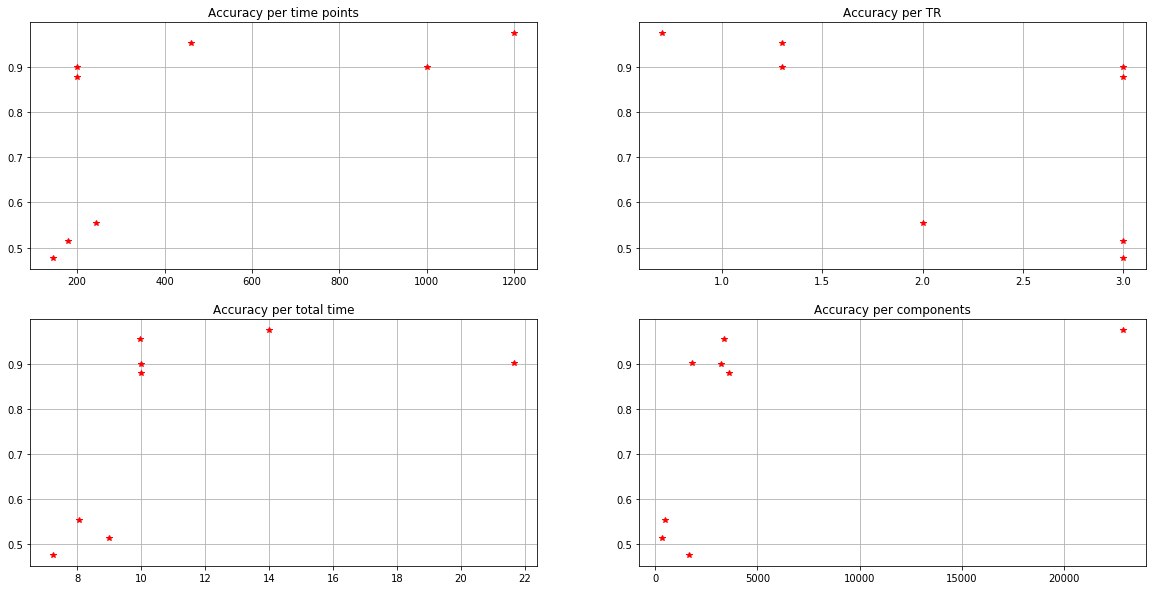

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(summary[:,0], summary[:,4], 'r*')
plt.title('Accuracy per time points')
plt.grid()
plt.subplot(2,2,2)
plt.plot(summary[:,1], summary[:,4], 'r*')
plt.title('Accuracy per TR')
plt.grid()
plt.subplot(2,2,3)
plt.plot(summary[:,2]/60, summary[:,4], 'r*')
plt.title('Accuracy per total time')
plt.grid()
plt.subplot(2,2,4)
plt.plot(summary[:,3], summary[:,4], 'r*')
plt.title('Accuracy per components')
plt.grid()